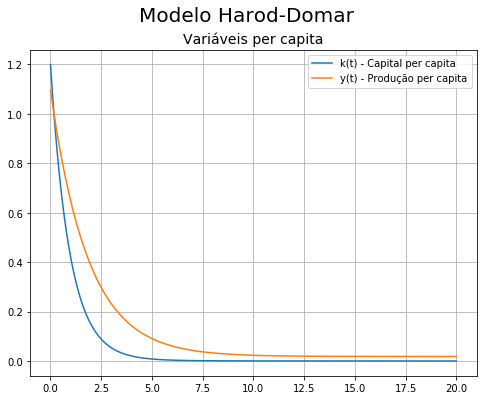

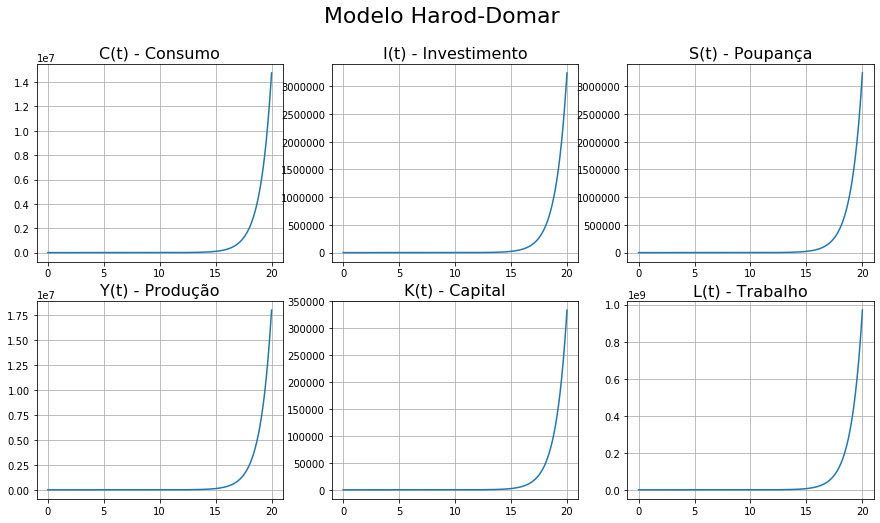

In [10]:
# Modelo de Crescimento Harrod-Domar

## 1. Chamando os pacotes:

import scipy.integrate                # Pacote utilizado para solucionar as equações diferenciais.
import numpy                          # Pacote utilizado para construção de matrizes e vetores.
import matplotlib.pyplot as plt       # Biblioteca para a construção de gráficos.

## 2. Solução das equações diferenciais do modelo:

### 2.1. Definição das equações diferenciais (modelo em termos per capita):

def Modelo_HD(var, t, A, s, n, delta, alpha):           # Definição da função (variáveis, tempo, parâmetros).
    k, L = var
    
    dk_dt = s*k**(alpha)-(n+delta)*k       # Equação fundamenta do crescimento econômico. 
    dL_dt = n*L                                         # Equação da taxa de crescimento da população.
      
    return ([dk_dt, dL_dt])                          

### 2.2. Definição dos valores dos parâmetros, da variável tempo e da solução da função:

A = 1               # Produtividade (Tecnoloigia)
alpha = 0.5         # Parâmetro da função de produção: y = min(alpha*k, beta).
s = 0.18            # Propensão marginal a poupar: S = s*Y.
n = 0.02            # Taxa de crescimento da população: (dL/dt)*(1/L) = n.
delta = 0.08        # Taxa de depreciação do estoque de capital: dK/dt = I - delta*K.
k0 = 1.2            # Estoque de capital incial.
L0 = 2              # Tamanho da população incial.

t = numpy.linspace(0, 20, 1000)            # Tempo utilizado na construção dos gráficos das variéveis em termos per capita.
t2 = numpy.linspace(0, 20, 1000)          # Tempo utilizado na construção dos gráficos das demais variéveis.   

solution = scipy.integrate.odeint(Modelo_HD, [k0, L0], t, args=(s, n, A, delta, alpha))    # Solução das equações diferenciais.
solution = numpy.array(solution)                                                           # Construção da matriz de solução.   

## 3. Definição das variáveis do modelo:

k = solution[:,0]                        # Estoque de capital per capita.
L = solution[:,1]                        # Tamanho da população (trabalho utilizado na função de produção). 
y = k**(alpha)                           # Produção per capita.
K = k*L                                  # Estoque de capital.
Y = A*K**(alpha)*L**(1-alpha)              # Produção.
I = s*Y                                  # Investimento.
S = I                                    # Poupança.
C = Y-I                                  # Consumo.

## 4. Gráficos:

### 4.1. Gráfico das variáveis em termos per capita:

plt.figure(figsize=[8,6])
plt.subplot(1,1,1)
plt.plot(t, k, label='k(t) - Capital per capita')
plt.plot(t, y, label='y(t) - Produção per capita')
plt.legend()
plt.title('Variáveis per capita', fontsize=14)
plt.grid()

plt.suptitle('Modelo Harod-Domar', fontsize=20)
plt.show()

### 4.2. Gráfico das demais variáveis:

plt.figure(figsize=[15,8])
plt.subplot(2,3,1)
plt.plot(t2, C)
plt.title('C(t) - Consumo', fontsize=16)
plt.grid()

plt.subplot(2,3,2)
plt.plot(t2, I)
plt.title('I(t) - Investimento', fontsize=16)
plt.grid()

plt.subplot(2,3,3)
plt.plot(t2, S)
plt.title('S(t) - Poupança', fontsize=16)
plt.grid()

plt.subplot(2,3,4)
plt.plot(t2, Y)
plt.title('Y(t) - Produção', fontsize=16)
plt.grid()

plt.subplot(2,3,5)
plt.plot(t2, K)
plt.title('K(t) - Capital', fontsize=16)
plt.grid()

plt.subplot(2,3,6)
plt.plot(t2, L)
plt.title('L(t) - Trabalho', fontsize=16)
plt.grid()

plt.suptitle('Modelo Harod-Domar', fontsize=22)
plt.show()